In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/04_Apr.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,61.000000,1,7,0,2361.0,2250.0,2309.0,2382.0,2337.0,2266.0,2368.583333,2475.0
1,24.916667,61.583333,1,7,0,2394.0,2251.0,2273.0,2298.0,2242.0,2203.0,2380.666667,2418.0
2,24.833333,62.166667,1,7,0,2640.0,2355.0,2247.0,2239.0,2040.0,2055.0,2379.083333,2228.0
3,24.750000,62.750000,1,7,0,2560.0,2347.0,2270.0,2254.0,2093.0,2039.0,2373.833333,2207.0
4,24.666667,63.333333,2,7,0,2475.0,2361.0,2250.0,2209.0,2076.0,2025.0,2367.583333,2175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,27.982450,33.440678,23,4,1,2893.0,2902.0,2927.0,2931.0,3129.0,2893.0,2902.750000,2907.0
8732,27.982450,33.440678,24,4,1,2893.0,2906.0,2900.0,2896.0,3118.0,2715.0,2904.416667,2920.0
8733,27.982450,33.440678,24,4,1,2918.0,2895.0,2913.0,2868.0,3081.0,2765.0,2904.916667,2919.0
8734,27.312450,33.440678,24,4,1,2917.0,2877.0,2912.0,2898.0,3041.0,2768.0,2898.250000,2832.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   int64  
 3   B       8736 non-null   int64  
 4   C       8736 non-null   int64  
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 887.4 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   float64
 3   B       8736 non-null   float64
 4   C       8736 non-null   float64
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(13)
memory usage: 887.4 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886


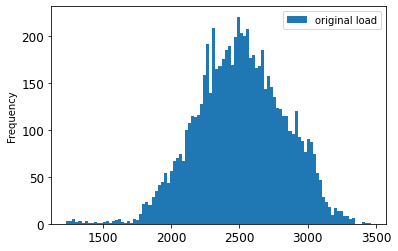

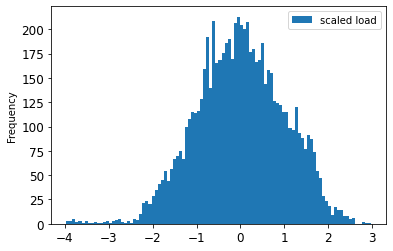

In [8]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

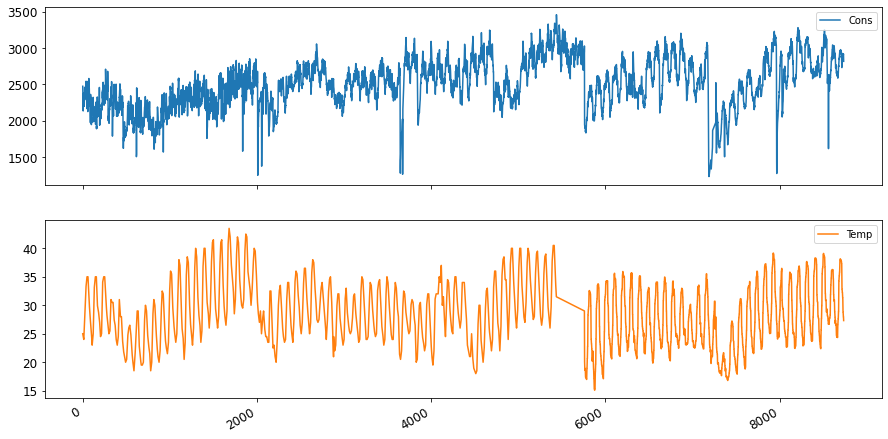

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618,-1.408596
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125,-1.470933
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300,-1.595606
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459,-1.654826
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886,-1.617424
5,-1.156132,-0.827048,1.269294,-1.516446,1.511106,-1.457887,-0.278477,-0.355287,-0.807618,-0.936612,-1.311182,-1.547748,-0.487208,-1.371194
6,-0.872499,-0.843076,1.305507,-1.516446,1.511106,-1.457887,-0.872887,0.417276,-0.479824,-0.885912,-1.151399,-1.309323,-0.522070,-1.037692
7,-0.856915,-0.859104,1.341721,-1.516446,1.511106,-1.457887,-0.938585,0.166036,-0.505039,-0.996819,-1.071507,-1.394241,-0.553392,-0.903668
8,-0.984705,-0.875133,1.377934,-1.372000,1.511106,-1.457887,-1.038696,-0.100907,-0.460913,-1.069700,-1.208921,-1.534683,-0.599694,-0.775877
9,-0.891200,-0.891161,1.414147,-1.372000,1.511106,-1.457887,-1.160707,-0.279915,-0.356901,-0.717967,-1.253660,-1.332185,-0.646813,-0.941070


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618,-1.408596
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125,-1.470933
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300,-1.595606
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459,-1.654826
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886,-1.617424
5,-1.156132,-0.827048,1.269294,-1.516446,1.511106,-1.457887,-0.278477,-0.355287,-0.807618,-0.936612,-1.311182,-1.547748,-0.487208,-1.371194
6,-0.872499,-0.843076,1.305507,-1.516446,1.511106,-1.457887,-0.872887,0.417276,-0.479824,-0.885912,-1.151399,-1.309323,-0.522070,-1.037692
7,-0.856915,-0.859104,1.341721,-1.516446,1.511106,-1.457887,-0.938585,0.166036,-0.505039,-0.996819,-1.071507,-1.394241,-0.553392,-0.903668
8,-0.984705,-0.875133,1.377934,-1.372000,1.511106,-1.457887,-1.038696,-0.100907,-0.460913,-1.069700,-1.208921,-1.534683,-0.599694,-0.775877
9,-0.891200,-0.891161,1.414147,-1.372000,1.511106,-1.457887,-1.160707,-0.279915,-0.356901,-0.717967,-1.253660,-1.332185,-0.646813,-0.941070


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7191,-3.927003,-0.763746,0.826318,1.372462,-0.931315,0.685924,-3.647216,-1.944382,0.040234,0.565382,0.817133,1.179441,-2.820275,NaN
7192,-3.893702,-0.763746,0.826318,1.516907,-0.931315,0.685924,-3.814902,-3.156616,-0.016500,0.451306,0.849089,1.163111,-3.159181,NaN
7193,-3.860401,-0.763746,0.826318,1.516907,-0.931315,0.685924,-3.982589,-3.324947,-0.419938,0.780858,0.858676,1.202304,-3.460315,NaN
7194,-3.827100,-0.947430,1.133664,1.516907,-0.931315,0.685924,-3.591530,-3.493278,-1.119653,0.910777,0.928981,1.421132,-3.698074,NaN
7195,-3.793799,-1.131114,1.441011,1.516907,-0.931315,0.685924,-3.941918,-3.661609,-1.951745,0.910777,0.983307,1.535446,-3.861019,NaN
7196,-3.760498,-1.131114,1.441011,1.661353,-0.931315,0.685924,-3.908493,-3.829940,-3.168365,0.765014,1.040829,1.460325,-3.915922,NaN
7197,-3.727197,-1.131114,1.441011,1.661353,-0.931315,0.685924,-3.875068,-3.998271,-3.337305,0.720651,1.018460,1.470124,-3.953316,NaN
7198,-3.693896,-1.204203,1.441011,1.661353,-0.931315,0.685924,-3.841643,-3.605708,-3.506245,0.590732,0.887437,1.287222,-3.973201,NaN
7199,-3.660595,-1.204203,1.521356,1.661353,-0.931315,0.685924,-3.808217,-3.957445,-3.675185,0.511513,0.826720,1.248029,-3.975578,NaN
7200,-3.627294,-1.204203,1.521356,-1.660891,-0.442831,0.685924,-3.774792,-3.923891,-3.844125,0.362581,0.631784,1.032467,-3.960446,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7091,0.586182,-0.373296,1.245575,1.228016,-1.419799,-1.457887,0.710120,0.074962,0.062297,1.012178,1.334831,0.820171,0.359298,-3.927003
7092,0.570598,-0.373296,1.245575,1.372462,-1.419799,-1.457887,0.644422,0.275954,-0.107904,0.926621,1.264526,1.447261,0.418401,-3.893702
7093,0.592416,-0.373296,1.245575,1.372462,-1.419799,-1.457887,0.600623,0.495789,-0.256041,0.844233,1.213396,1.489720,0.492212,-3.860401
7094,0.514495,-0.607950,1.463681,1.372462,-1.419799,-1.457887,0.628780,0.693641,-0.221371,0.799870,1.091960,1.417866,0.556217,-3.827100
7095,0.514495,-0.842605,1.681786,1.372462,-1.419799,-1.457887,0.588109,0.712484,0.074904,0.768183,1.095156,1.365609,0.594621,-3.793799
7096,0.402289,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.572467,0.646533,0.276624,0.799870,1.079177,1.205570,0.605787,-3.760498
7097,0.726440,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.594366,0.602566,0.497254,0.809377,1.117525,1.414600,0.626215,-3.727197
7098,0.854231,-0.806060,1.608640,1.516907,-1.419799,-1.457887,0.516155,0.630831,0.695822,0.879090,1.331635,1.492986,0.640650,-3.693896
7099,0.854231,-0.769516,1.535494,1.516907,-1.419799,-1.457887,0.516155,0.590004,0.714733,0.932958,1.443484,1.342746,0.653451,-3.660595
7100,0.710856,-0.769516,1.535494,1.661353,-1.419799,-1.457887,0.403530,0.574302,0.648544,0.989996,1.369983,1.228433,0.659443,-3.627294


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.408596
1,-1.470933
2,-1.595606
3,-1.654826
4,-1.617424
...,...
7096,-3.760498
7097,-3.727197
7098,-3.693896
7099,-3.660595


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,0.402289,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.572467,0.646533,0.276624,0.799870,1.079177,1.205570,0.605787
7097,0.726440,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.594366,0.602566,0.497254,0.809377,1.117525,1.414600,0.626215
7098,0.854231,-0.806060,1.608640,1.516907,-1.419799,-1.457887,0.516155,0.630831,0.695822,0.879090,1.331635,1.492986,0.640650
7099,0.854231,-0.769516,1.535494,1.516907,-1.419799,-1.457887,0.516155,0.590004,0.714733,0.932958,1.443484,1.342746,0.653451


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1353.842105,22.622452,67.976944,1.0,3.0,1.0,1311.105263,1268.368421,1234.000000,2595.0,2652.0,2724.0,1305.302632
7202,1364.526316,22.207452,70.381340,1.0,3.0,1.0,1321.789474,1279.052632,1359.000000,2569.0,2649.0,2729.0,1305.763158
7203,1375.210526,21.792452,72.785736,1.0,3.0,1.0,1332.473684,1289.736842,1247.000000,2551.0,2638.0,2657.0,1316.447368
7204,1385.894737,21.792452,72.785736,2.0,3.0,1.0,1343.157895,1300.421053,1257.684211,2541.0,2621.0,2710.0,1327.131579
7205,1396.578947,21.792452,72.785736,2.0,3.0,1.0,1353.842105,1311.105263,1268.368421,2520.0,2609.0,2676.0,1337.815789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,2616.000000,24.962452,56.902264,24.0,5.0,1.0,2815.000000,2926.000000,3041.000000,2696.0,1603.0,2874.0,2846.250000
8158,2538.000000,25.262451,56.902264,24.0,5.0,1.0,2826.000000,2874.000000,3029.000000,2684.0,1439.5,2857.0,2805.333333
8159,2596.000000,25.262451,54.062824,24.0,5.0,1.0,2776.000000,2827.000000,2994.000000,2530.0,1276.0,2818.0,2772.166667
8160,2580.000000,25.262451,54.062824,1.0,6.0,1.0,2728.000000,2782.000000,2962.000000,2609.0,1408.0,2797.0,2740.333333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,0.576463,0.972470,-2.514700
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,0.497881,0.889529,-2.488650
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,0.426444,0.853242,-2.462600
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,0.388344,0.770300,-2.436550
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,0.312144,0.684767,-2.410500


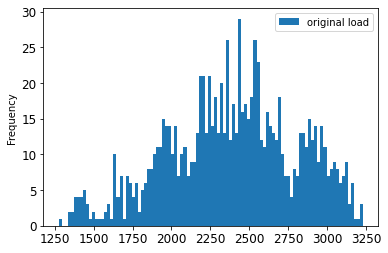

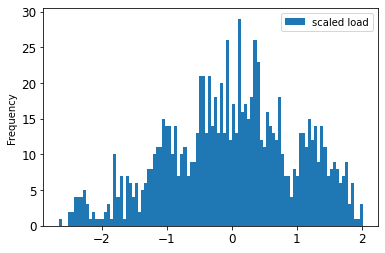

In [19]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022,-1.749264
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899,-1.730054
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850,-1.734857
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800,-1.761270
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750,-1.778079
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,0.576463,0.972470,-2.514700,-1.794887
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,0.497881,0.889529,-2.488650,-1.802091
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,0.426444,0.853242,-2.462600,-1.823702
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,0.388344,0.770300,-2.436550,-1.821301
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,0.312144,0.684767,-2.410500,-1.799690


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022,-1.749264
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899,-1.730054
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850,-1.734857
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800,-1.761270
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750,-1.778079
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,0.576463,0.972470,-2.514700,-1.794887
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,0.497881,0.889529,-2.488650,-1.802091
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,0.426444,0.853242,-2.462600,-1.823702
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,0.388344,0.770300,-2.436550,-1.821301
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,0.312144,0.684767,-2.410500,-1.799690


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8052,0.707194,0.168732,-1.053888,1.372873,-0.003002,0.654167,0.724557,0.554233,-0.231165,1.776487,1.131295,0.622561,0.590311,0.947317
8053,0.736009,0.168732,-1.053888,1.372873,-0.003002,0.654167,0.632107,0.650235,-0.018173,1.760189,1.131295,0.570722,0.657768,1.026558
8054,0.760021,0.039620,-0.858497,1.372873,-0.003002,0.654167,0.703222,0.783702,0.287424,1.727593,1.145582,0.539619,0.700436,1.052971
8055,0.690386,-0.089491,-0.663106,1.372873,-0.003002,0.654167,0.726927,0.708773,0.449483,1.667057,1.071764,0.521476,0.722989,0.932910
8056,0.752818,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.710334,0.729847,0.562924,1.622819,1.074145,0.503332,0.740869,0.817651
8057,0.851268,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.738780,0.638528,0.657845,1.634460,1.162251,0.487781,0.758748,0.548713
8058,0.848867,-0.121553,-0.629546,1.517204,-0.003002,0.654167,0.762485,0.708773,0.789807,1.590222,1.343226,0.664031,0.764844,0.361417
8059,0.870478,-0.153614,-0.595987,1.517204,-0.003002,0.654167,0.693740,0.732189,0.715723,1.145514,1.383708,0.669215,0.779270,0.500688
8060,0.808046,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.755374,0.715798,0.736559,0.456334,1.357514,0.731421,0.786584,0.462269
8061,0.740811,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.852564,0.743896,0.646269,-1.748579,1.226545,0.617377,0.796134,0.354213


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7201,-1.749264
7202,-1.730054
7203,-1.734857
7204,-1.761270
7205,-1.778079
...,...
8057,0.548713
8058,0.361417
8059,0.500688
8060,0.462269


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.851268,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.738780,0.638528,0.657845,1.634460,1.162251,0.487781,0.758748
8058,0.848867,-0.121553,-0.629546,1.517204,-0.003002,0.654167,0.762485,0.708773,0.789807,1.590222,1.343226,0.664031,0.764844
8059,0.870478,-0.153614,-0.595987,1.517204,-0.003002,0.654167,0.693740,0.732189,0.715723,1.145514,1.383708,0.669215,0.779270
8060,0.808046,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.755374,0.715798,0.736559,0.456334,1.357514,0.731421,0.786584


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
29/29 [==============================] - 0s 8ms/step - loss: 1.1449 - val_loss: 0.8701
Epoch 2/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1425 - val_loss: 0.8687
Epoch 3/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1401 - val_loss: 0.8672
Epoch 4/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1377 - val_loss: 0.8659
Epoch 5/300
29/29 [==============================] - 0s 3ms/step - loss: 1.1354 - val_loss: 0.8645
Epoch 6/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1331 - val_loss: 0.8632
Epoch 7/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1309 - val_loss: 0.8619
Epoch 8/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1287 - val_loss: 0.8606
Epoch 9/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1265 - val_loss: 0.8594
Epoch 10/300
29/29 [==============================] - 0s 2ms/step - loss: 1.1244 - val_loss: 0.8582
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 1.0373 - val_loss: 0.8150
Epoch 84/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0367 - val_loss: 0.8148
Epoch 85/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0361 - val_loss: 0.8145
Epoch 86/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0354 - val_loss: 0.8143
Epoch 87/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0348 - val_loss: 0.8140
Epoch 88/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0342 - val_loss: 0.8138
Epoch 89/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0336 - val_loss: 0.8135
Epoch 90/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0330 - val_loss: 0.8133
Epoch 91/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0324 - val_loss: 0.8130
Epoch 92/300
29/29 [==============================] - 0s 2ms/step - loss: 1.0318 - val_loss: 0.8128
Epoch 93/300


29/29 [==============================] - 0s 2ms/step - loss: 0.9760 - val_loss: 0.7839
Epoch 246/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9756 - val_loss: 0.7836
Epoch 247/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9752 - val_loss: 0.7833
Epoch 248/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9749 - val_loss: 0.7829
Epoch 249/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9745 - val_loss: 0.7826
Epoch 250/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9741 - val_loss: 0.7822
Epoch 251/300
29/29 [==============================] - 0s 3ms/step - loss: 0.9737 - val_loss: 0.7819
Epoch 252/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9733 - val_loss: 0.7815
Epoch 253/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9729 - val_loss: 0.7811
Epoch 254/300
29/29 [==============================] - 0s 2ms/step - loss: 0.9725 - val_loss: 0.7808
Epoc

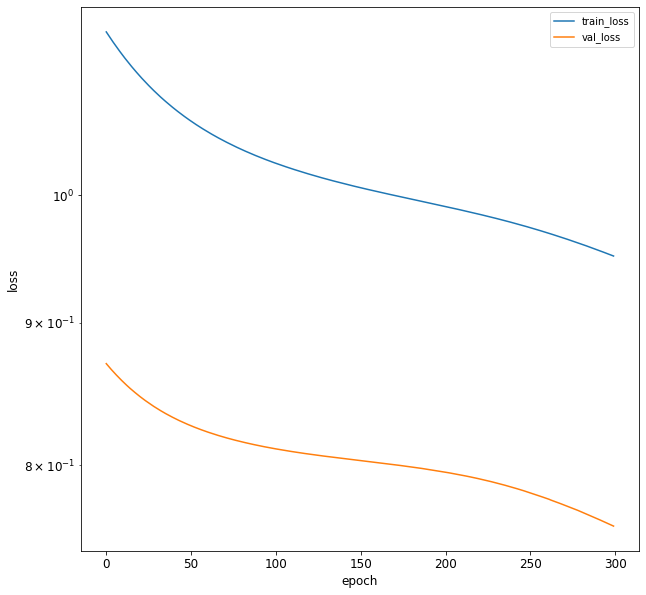

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,2534.0,25.112452,55.120832,1.0,6.0,1.0,2538.0,2826.0,2874.0,2559.0,1603.0,2760.0,2679.416667
8163,2529.0,24.962452,56.178840,1.0,6.0,1.0,2596.0,2776.0,2827.0,2558.0,1723.0,2747.0,2654.583333
8164,2524.0,24.962452,56.178840,2.0,6.0,1.0,2580.0,2728.0,2782.0,2528.0,1809.0,2729.0,2633.083333
8165,2538.0,24.962452,56.178840,2.0,6.0,1.0,2535.0,2616.0,2815.0,2519.0,1862.0,2721.0,2610.000000
8166,2535.0,24.657452,57.297104,2.0,6.0,1.0,2534.0,2538.0,2826.0,2532.0,1938.0,2706.0,2585.750000
8167,2546.0,24.352451,58.415367,2.0,6.0,1.0,2529.0,2596.0,2776.0,2525.0,1970.0,2680.0,2566.583333
8168,2530.0,24.352451,58.415367,3.0,6.0,1.0,2524.0,2580.0,2728.0,2515.0,1973.0,2687.0,2550.083333
8169,2508.0,24.352451,58.415367,3.0,6.0,1.0,2538.0,2535.0,2616.0,2498.0,1987.0,2632.0,2541.083333
8170,2511.0,23.417451,62.178333,3.0,6.0,1.0,2535.0,2534.0,2538.0,2471.0,2003.0,2637.0,2538.833333
8171,2500.0,22.482450,65.941300,3.0,6.0,1.0,2546.0,2529.0,2596.0,2459.0,2009.0,2626.0,2530.833333


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


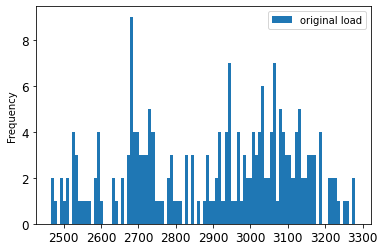

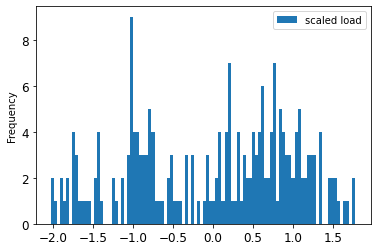

In [33]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.705257,-0.814252,0.787168,-1.498364,0.037858,1.12041,-1.652399,-0.333183,-0.123017,-1.179917,-3.272249,0.291871,-1.059521,-0.389998
8163,-1.728578,-0.843013,0.861006,-1.498364,0.037858,1.12041,-1.385634,-0.563775,-0.341199,-1.184135,-2.886408,0.258804,-1.179687,-0.529919
8164,-1.751898,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.459225,-0.785143,-0.550096,-1.310698,-2.609889,0.213019,-1.283723,-0.543911
8165,-1.686601,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.666198,-1.301668,-0.396905,-1.348667,-2.439475,0.192671,-1.395420,-0.669840
8166,-1.700593,-0.901493,0.939049,-1.357685,0.037858,1.12041,-1.670797,-1.661391,-0.345841,-1.293823,-2.195109,0.154517,-1.512763,-0.749129
8167,-1.649289,-0.959973,1.017092,-1.357685,0.037858,1.12041,-1.693794,-1.393904,-0.577949,-1.323354,-2.092218,0.088384,-1.605508,-0.758457
8168,-1.723914,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.716791,-1.467694,-0.800773,-1.365542,-2.082572,0.106189,-1.685350,-0.786441
8169,-1.826523,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.652399,-1.675226,-1.320695,-1.437260,-2.037557,-0.033709,-1.728900,-0.982331
8170,-1.812530,-1.139248,1.279707,-1.217006,0.037858,1.12041,-1.666198,-1.679838,-1.682784,-1.551167,-1.986112,-0.020991,-1.739787,-1.005651
8171,-1.863835,-1.318523,1.542322,-1.217006,0.037858,1.12041,-1.615604,-1.702897,-1.413538,-1.601792,-1.966820,-0.048970,-1.778498,-0.921698


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.705257,-0.814252,0.787168,-1.498364,0.037858,1.12041,-1.652399,-0.333183,-0.123017,-1.179917,-3.272249,0.291871,-1.059521,-0.389998
8163,-1.728578,-0.843013,0.861006,-1.498364,0.037858,1.12041,-1.385634,-0.563775,-0.341199,-1.184135,-2.886408,0.258804,-1.179687,-0.529919
8164,-1.751898,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.459225,-0.785143,-0.550096,-1.310698,-2.609889,0.213019,-1.283723,-0.543911
8165,-1.686601,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.666198,-1.301668,-0.396905,-1.348667,-2.439475,0.192671,-1.395420,-0.669840
8166,-1.700593,-0.901493,0.939049,-1.357685,0.037858,1.12041,-1.670797,-1.661391,-0.345841,-1.293823,-2.195109,0.154517,-1.512763,-0.749129
8167,-1.649289,-0.959973,1.017092,-1.357685,0.037858,1.12041,-1.693794,-1.393904,-0.577949,-1.323354,-2.092218,0.088384,-1.605508,-0.758457
8168,-1.723914,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.716791,-1.467694,-0.800773,-1.365542,-2.082572,0.106189,-1.685350,-0.786441
8169,-1.826523,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.652399,-1.675226,-1.320695,-1.437260,-2.037557,-0.033709,-1.728900,-0.982331
8170,-1.812530,-1.139248,1.279707,-1.217006,0.037858,1.12041,-1.666198,-1.679838,-1.682784,-1.551167,-1.986112,-0.020991,-1.739787,-1.005651
8171,-1.863835,-1.318523,1.542322,-1.217006,0.037858,1.12041,-1.615604,-1.702897,-1.413538,-1.601792,-1.966820,-0.048970,-1.778498,-0.921698


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8269,-0.982331,-1.243745,1.610015,-1.076327,0.611132,-0.89253,-0.649730,-0.517656,-0.067311,-1.572260,-0.535992,-1.491184,-0.607489,-1.005651
8270,-1.005651,-1.231282,1.511853,-1.076327,0.611132,-0.89253,-0.727920,-0.379301,-0.336557,-1.517417,-0.561715,-1.407245,-0.665556,-0.949683
8271,-0.921698,-1.218819,1.413692,-1.076327,0.611132,-0.89253,-0.737119,-0.517656,-0.252998,-1.462573,-0.597083,-1.353830,-0.723622,-0.982331
8272,-0.996323,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.764715,-0.531492,-0.573307,-1.462573,-0.564930,-1.280066,-0.760317,-0.996323
8273,-1.042963,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.957890,-0.656011,-0.531528,-1.298042,-0.436316,-1.292784,-0.804673,-1.038299


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8162,-0.389998
8163,-0.529919
8164,-0.543911
8165,-0.669840
8166,-0.749129
...,...
8269,-1.005651
8270,-0.949683
8271,-0.982331
8272,-0.996323


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,-1.705257,-0.814252,0.787168,-1.498364,0.037858,1.12041,-1.652399,-0.333183,-0.123017,-1.179917,-3.272249,0.291871,-1.059521
8163,-1.728578,-0.843013,0.861006,-1.498364,0.037858,1.12041,-1.385634,-0.563775,-0.341199,-1.184135,-2.886408,0.258804,-1.179687
8164,-1.751898,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.459225,-0.785143,-0.550096,-1.310698,-2.609889,0.213019,-1.283723
8165,-1.686601,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.666198,-1.301668,-0.396905,-1.348667,-2.439475,0.192671,-1.395420
8166,-1.700593,-0.901493,0.939049,-1.357685,0.037858,1.12041,-1.670797,-1.661391,-0.345841,-1.293823,-2.195109,0.154517,-1.512763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-0.982331,-1.243745,1.610015,-1.076327,0.611132,-0.89253,-0.649730,-0.517656,-0.067311,-1.572260,-0.535992,-1.491184,-0.607489
8270,-1.005651,-1.231282,1.511853,-1.076327,0.611132,-0.89253,-0.727920,-0.379301,-0.336557,-1.517417,-0.561715,-1.407245,-0.665556
8271,-0.921698,-1.218819,1.413692,-1.076327,0.611132,-0.89253,-0.737119,-0.517656,-0.252998,-1.462573,-0.597083,-1.353830,-0.723622
8272,-0.996323,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.764715,-0.531492,-0.573307,-1.462573,-0.564930,-1.280066,-0.760317


In [39]:
predictions = model.predict(X_test)
predictions

array([[0.10083961],
       [0.09646329],
       [0.0929054 ],
       [0.09099555],
       [0.08943278],
       [0.08911404],
       [0.08632892],
       [0.08098173],
       [0.07970792],
       [0.081083  ],
       [0.08035666],
       [0.07962814],
       [0.07998922],
       [0.08033881],
       [0.08020285],
       [0.08061463],
       [0.08170071],
       [0.08217672],
       [0.0821366 ],
       [0.08203495],
       [0.08302149],
       [0.08351606],
       [0.0829576 ],
       [0.08367395],
       [0.08542904],
       [0.0864225 ],
       [0.0879401 ],
       [0.09000683],
       [0.09119147],
       [0.09280699],
       [0.09810397],
       [0.1019319 ],
       [0.10687092],
       [0.11202386],
       [0.12130377],
       [0.12489459],
       [0.12995654],
       [0.13738048],
       [0.14826667],
       [0.15670541],
       [0.1729685 ],
       [0.18153712],
       [0.19128537],
       [0.20645887],
       [0.22321048],
       [0.23784494],
       [0.2437138 ],
       [0.252

In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2899.617925
dtype: float64
Cons    214.91376
dtype: float64


In [41]:
load_mean=2899.617925
load_std=214.91376
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


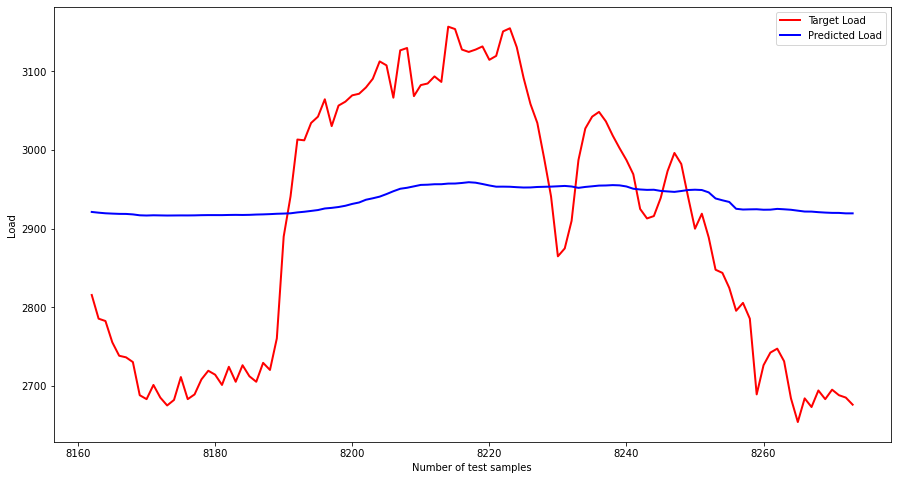

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

5.022203553791045


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -1.589202
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8162  281476.462535
8163  278468.275802
8164  278167.479935
8165  275460.073869
8166  273755.403324
...             ...
8269  268240.134885
8270  269443.474454
8271  268741.536418
8272  268440.726556
8273  267538.229448

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8162  11127.656288
8163  18122.016409
8164  18730.794024
8165  26736.826911
8166  32478.633954
...            ...
8269  56162.906775
8270  50440.598872
8271  53622.872902
8272  54750.053673
8273  59059.703833

[112 rows x 1 columns]
y_t+100    25316.995359
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    159.113153
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[2921.2898]
[2920.349]
[2919.5845]
[2919.174]
[2918.8381]
[2918.7698]
[2918.1711]
[2917.022]
[2916.7483]
[2917.0437]
[2916.8877]
[2916.7312]
[2916.8086]
[2916.8838]
[2916.8547]
[2916.943]
[2917.1765]
[2917.2788]
[2917.2703]
[2917.2483]
[2917.4604]
[2917.5667]
[2917.4465]
[2917.6006]
[2917.9778]
[2918.1914]
[2918.5176]
[2918.9617]
[2919.2163]
[2919.5635]
[2920.702]
[2921.5244]
[2922.586]
[2923.6934]
[2925.6877]
[2926.4595]
[2927.5474]
[2929.1428]
[2931.4824]
[2933.2961]
[2936.7913]
[2938.6328]
[2940.7278]
[2943.9888]
[2947.5889]
[2950.7341]
[2951.9954]
[2953.798]
[2955.6235]
[2955.896]
[2956.4858]
[2956.51]
[2957.308]
[2957.3728]
[2958.0894]
[2959.0527]
[2958.434]
[2956.7683]
[2954.915]
[2953.3682]
[2953.4226]
[2953.2815]
[2952.7375]
[2952.3113]
[2952.4128]
[2952.9956]
[2953.2322]
[2953.46]
[2953.877]
[2954.3303]
[2953.6135]
[2951.8755]
[2953.0525]
[2953.8677]
[2954.7517]
[2954.9111]
[2955.3645]
[2955.0486]
[2953.6416]
[2950.7532]
[2949.8162]
[2949.318]
[2949.487]
[2947.9968]
[2947.3486